<a href="https://colab.research.google.com/github/mrdbourke/tensorflow-deep-learning/blob/main/02_neural_network_classification_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Làm việc với mẫu lớn (phân loại đa lớp)

Chúng ta đã thấy mẫu phân loại đa lớp nhị phân (dự đoán xem một điểm dữ liệu có thuộc về đường tròn đỏ hoặc xanh không), tuy nhiên nếu có nhiều lớp khác nhau thì sao?

Ví dụ: giả sử bạn là một công ty thời trang và cần xây dựng một mạng nơ-ron để dự đoán xem một mảnh vải là của giày, áo sơ mi hay áo khoác (3 lựa chọn khác nhau).

Khi lựa chọn có nhiều hơn 2 lớp thì đây là **multiclass classification (phân loại đa lớp)**.

Điều tốt là những thứ mà chúng ta học được cho tới giờ (với một số điều chỉnh) có thể áp dụng cho các bài toán phân loại đa lớp.

Hãy xem triển khai của điều này.

Để bắt đầu, chúng ta cần một số dữ liệu. Tin tốt là TensorFlow có một tập dữ liệu phân loại đa lớp có sẵn là [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist), chúng ta có thể bắt đầu ngay lập tức.

Import nó bằng module [`tf.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets).

> 📖 **Nguồn:** Bài toán phân loại đa lớp sau được lấy từ [TensorFlow classification guide](https://www.tensorflow.org/tutorials/keras/classification). Nên đi qua các ví dụ rồi lặp lại hướng dẫn của TensorFlow.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Dữ liệu đã được sắp xếp thành tập huấn luyện và tập kiểm tra
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Hãy xem một ví dụ.

In [ ]:
# Hiển thị mẫu huấn luyện đầu tiên
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

Chúng ta nhận được một danh sách khá dài có các số, theo sau (dữ liệu) là một số duy nhất (class label).

Vậy còn shape?

In [ ]:
# Kiểm tra shape của dữ liệu
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
#Kiểm tra shape của một mẫu đơn lẻ
train_data[0].shape, train_labels[0].shape

((28, 28), ())

60,000 mẫu huấn luyện, mỗi mẫu có shape (28, 28) và một nhãn cũng như 10,000 mẫu kiểm tra, mỗi mẫu có shape (28, 28)

Nhưng đó chỉ là các số, hãy trực quan hóa chúng.

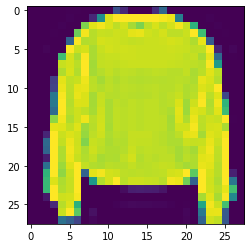

In [ ]:
# Lập biểu đồ một mẫu duy nhất
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

Vậy còn nhãn của nó thì sao?

In [ ]:
# Kiểm tra các nhãn mẫu
train_labels[7]

2

Có vẻ các nhãn của chúng ta ở dạng số. Dù điều này tốt với mạng nơ-ron, chúng ta vẫn cần nhãn ở dạng con người đọc được.

Hãy tạo một danh sách nhỏ gồm tên các lớp (chúng ta có thể tìm thấy trong tập dữ liệu của [GitHub](https://github.com/zalandoresearch/fashion-mnist#labels) ).

> 🔑 **Lưu ý:** Mặc dù tập dữ liệu này đã được chuẩn bị và sẵn sàng hoạt động, cần nhớ rằng nhiều tập dữ liệu sẽ không như vậy. Các bạn thường sẽ phải thực hiện một số bước tiền xử lý để nó sẵn sàng sử dụng với mạng nơ-ron (chúng ta sẽ thấy nhiều hơn khi thực hiện với dữ liệu sau này).

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Có bao nhiêu lớp (đây sẽ là shape đầu ra)?
len(class_names)

10

Hãy lập biểu đồ một mẫu khác.

> 🤔 **Câu hỏi:** Hãy đặc biệt chú ý xem dữ liệu mà chúng ta đang thực hiện *trông* như thế nào? Nó có phải chỉ là đường thẳng hay không phải đường thẳng? Các bạn có nghĩ rằng nếu chúng ta cần tìm pattern trong các bức hình về trang phục (thực ra là tập hợp các điểm ảnh) thì mô hình có cần phi tuyến tính (không phải đường thẳng) hay không?

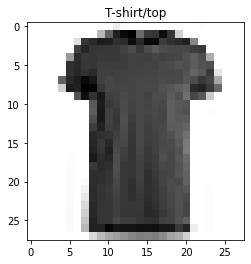

In [ ]:
# Vẽ biểu đồ ảnh mẫu và nhãn của nó
plt.imshow(train_data[17], cmap=plt.cm.binary) # thay đổi màu sắc thành đen và trắng
plt.title(class_names[train_labels[17]]);

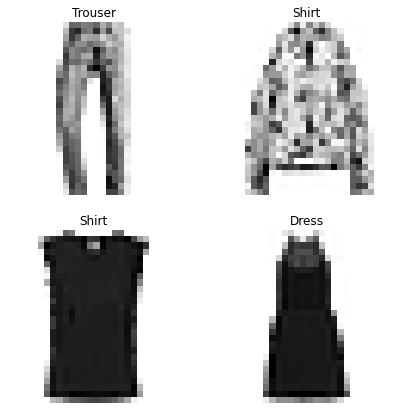

In [ ]:
# Vẽ biểu đồ nhiều hình của fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

Hãy xây dựng mô hình để tìm mối quan hệ giữa các giá trị điểm ảnh và nhãn của chúng.

Vì đây là bài toán phân loại nên chúng ta sẽ thay đổi một ít kiến trúc (trực tiếp với Bảng 1 ở trên):

* **Input shape** sẽ phải xử lý tensor 28x28 (chiều cao và rộng của ảnh).
  * Thực ra chúng ta sẽ nén đầu vào thành một tensor (vectơ) có shape `(784)`.
* **Output shape** sẽ phải là 10 vì chúng ta cần mô hình dự đoán cho 10 lớp khác nhau.
  * Chúng ta cũng sẽ thay đổi tham số `activation` của lớp đầu ra thành [`"softmax"`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) thay vì `'sigmoid'`. Hàm kích hoạt `"softmax"` sẽ xuất ra một chuỗi các giá trị trong khoảng từ 0 tới 1 (có shape tương tự như **output shape**, cộng lại thành ~1). Chỉ mục có giá trị cao nhất mà mô hình dự đoán *rất có thể* là lớp.
* Chúng ta cần thay đổi hàm mất mát từ hàm mất mát nhị phân thành hàm mất mát đa lớp.
  * Cụ thể, chúng ta sẽ dùng [`tf.keras.losses.SparseCategoricalCrossentropy()`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy) nếu các nhãn ở dạng số nguyên, dùng [`tf.keras.losses.CategoricalCrossentropy()`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) nếu các nhãn được mã hóa one-hot.
* Chúng ta cũng sẽ sử dụng tham số `validation_data` khi gọi hàm `fit()`, điều này cho biết cách mô hình hoạt động trên tập kiểm tra trong suốt quá trình huấn luyện.

Hãy thử thôi.

In [ ]:
# Thiết lập random seed
tf.random.set_seed(42)

# Tạo mô hình
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # lớp đầu vào (cần reshape 28x28 thành 784, lớp Flatten sẽ thực hiện điều này cho chúng ta)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape là 10, activation là softmax
])

# Biên dịch mô hình
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # hàm mất mát khác nhau cho phân loại đa lớp
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Khớp mô hình
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # xem mô hình hoạt động như thế nào trên tập kiểm tra trong quá trình huấn luyện

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.1631 - accuracy: 0.1622 - val_loss: 1.7951 - val_accuracy: 0.2100
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.7094 - accuracy: 0.2514 - val_loss: 1.6439 - val_accuracy: 0.3022
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6353 - accuracy: 0.2847 - val_loss: 1.6003 - val_accuracy: 0.2818
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6099 - accuracy: 0.2858 - val_loss: 1.5964 - val_accuracy: 0.2958
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5958 - accuracy: 0.3040 - val_loss: 1.5948 - val_accuracy: 0.3005
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5842 - accuracy: 0.3115 - val_loss: 1.5678 - val_accuracy: 0.3195
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5700 - accuracy: 0.3205 - val_loss: 1.5695 - val_accuracy:

In [ ]:
# Kiểm tra shape của mô hình
# Lưu ý: "None" trong (None, 784) là batch_size, chúng ta sẽ đề cập nó sau
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_29 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_30 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Mô hình đạt được độ chính xác ~35% sau 10 epoch, sử dụng mô hình có phong cách tương tự như mô hình mà chúng ta dùng cho bài toán phân loại nhị phân, điều này tốt hơn so với việc đoán (đoán 10 lớp được độ chính xác 10%), nhưng chúng ta có thể làm tốt hơn thế.

Các bạn còn nhớ khi chúng ta nhắc tới mạng nơ-ron ưu tiên các số trong khoảng từ 0 tới 1 không? (nếu không, hãy coi đây là một lời nhắc)

Bây giờ dữ liệu mà chúng ta có không trong khoảng 0-1, nói cách khác, nó không được chuẩn hóa (nên chúng ta dùng biến `non_norm_history` khi gọi `fit()`). Nó là giá trị điểm ảnh trong khoảng 0-255.

Hãy xem.

In [ ]:
# Kiểm tra các giá trị nhỏ nhất, lớn nhất của dữ liệu huấn luyện
train_data.min(), train_data.max()

(0, 255)

Chúng ta thu được các giá trị từ 0 tới 1 bằng cách chia toàn bộ mảng cho giá trị lớn nhất: `255.0`(chia cho float cũng chuyển thành float).


Làm như vậy sẽ khiến toàn bộ dữ liệu nằm trong khoảng 0-1 (gọi là **co giãn (scaling)** hoặc **chuẩn hóa (normalization)**).

In [ ]:
# Chia các hình ảnh huấn luyện và kiểm tra cho giá trị lớn nhất (chuẩn hóa nó)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Kiểm tra các giá trị lớn nhất và nhỏ nhất của dữ liệu huấn luyện
train_data.min(), train_data.max()

(0.0, 1.0)

Tuyệt! Giờ dữ liệu đã nằm trong khoảng 0-1. Hãy xem điều gì sẽ xảy ra nếu chúng ta mô hình hóa nó.

Chúng ta sẽ sử dụng mô hình tương tự như trước (`model_11`) trừ việc lần này dữ liệu được chuẩn hóa.

In [ ]:
# Thiết lập random seed
tf.random.set_seed(42)

# Tạo mô hình
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # lớp đầu vào (cần reshape 28x28 thành 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape là 10, activation là softmax
])

# Biên dịch mô hình
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Khớp mô hình (với dữ liệu đã chuẩn hóa)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

Cùng một mô hình như trước nhưng lần này, mô hình với dữ liệu đã chuẩn hóa cho độ chính xác cao hơn nhiều!

Lập biểu đồ lịch sử của từng mô hình (loss curve)

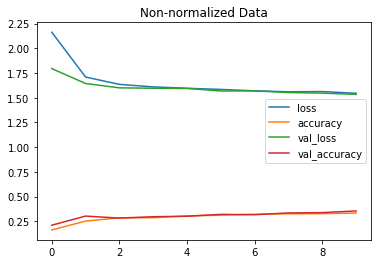

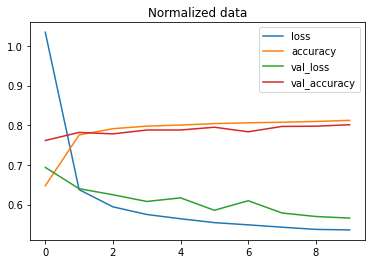

In [ ]:
import pandas as pd
# Vẽ biểu đồ loss curve của dữ liệu không được chuẩn hóa
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Vẽ biểu đồ loss curve của dữ liệu đã được chuẩn hóa
pd.DataFrame(norm_history.history).plot(title="Normalized data");

Từ 2 biểu đồ trên, chúng ta thấy rằng mô hình với dữ liệu đã chuẩn hóa (`model_12`) cải thiện nhanh hơn so với mô hình không có dữ liệu được chuẩn hóa (`model_11`).

> 🔑 **Lưu ý:** Cùng một mô hình nhưng dữ liệu khác *một chút* cũng dẫn tới các kết quả khác biệt *đáng kể*. Do đó, khi so sánh các mô hình, cần đảm bảo so sánh trên cùng tiêu chí (ví dụ: kiến trúc giống nhau nhưng dữ liệu khác nhau hoặc dữ liệu giống nhau nhưng kiến trúc khác nhau).

Hãy tìm tốc độ học tốt nhất và xem điều gì xảy ra?

Chúng ta sẽ dùng cũng một kiến trúc đang được sử dụng.

In [ ]:
# Thiết lập random seed
tf.random.set_seed(42)

# Tạo mô hình
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # lớp đầu vào (cần reshape 28x28 thành 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape là 10, activation là softmax
])

# Biên dịch mô hình
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Tạo learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Khớp mô hình
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, # mô hình đang hoạt động khá tốt với tốc độ học hiện tại, có thể không cần 100 epoch
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - val_accuracy:

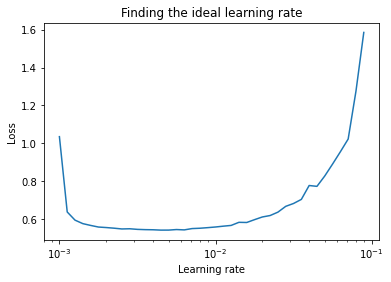

In [ ]:
# Vẽ đường cong suy giảm tốc độ học
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # cần trục x theo thang log
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

Trong trường hợp này, nó trông khá sát với tốc độ học của [thuật toán tối ưu Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam), (`0.001`) là tốc độ học lý tưởng.

Hãy khớp lại mô hình với tốc độ học lý tưởng.

In [ ]:
# Thiết lập random seed
tf.random.set_seed(42)

# Tạo mô hình
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # lớp đầu vào (cần reshape 28x28 thành 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape là 10, activation là softmax
])

# Biên dịch mô hình
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # tốc độ học lý tưởng (giống mặc định)
                 metrics=["accuracy"])

# Khớp mô hình
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

Chúng ta có một mô hình được huấn luyện với tốc độ học gần như lý tưởng, hoạt động rất tốt và một vài lựa chọn.

Chúng ta có thể:
* Đánh giá chất lượng bằng một phép đo phân loại khác ([confusion matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py) hoặc [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)).
* Đánh giá một số dự đoán của mô hình (bằng cách trực quan).
* Cải thiện độ chính xác (huấn luyện lâu hơn hoặc thay đổi kiến trúc).
* Lưu và xuất để dùng nó trong ứng dụng.

Hãy xem xét hai tùy chọn đầu tiên.

Trước tiên chúng ta sẽ tạo một ma trận phân loại để hiển thị dự đoán trên các lớp khác nhau.

In [ ]:
# Lưu ý: Code sau của confusion matrix là bản phối lại của Scikit-Learn giữa
# hàm plot_confusion_matrix - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# và notebook giới thiệu của Made with ML - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Hàm cần một tên khác cho plot_confusion_matrix của sklearn
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Tạo một confusion matrix đã dán nhãn so sánh với các dự đoán và nhãn gốc.

  Nếu lớp được truyền, confusion matrix sẽ được gắn nhãn, nếu không sẽ dùng các giá trị integer class.


  Đối số:
    y_true: Mảng gồm các truth label (phải có shape giống với y_pred).
    y_pred: Mảng gồm các nhãn đã được dự đoán (phải có shape giống với y_true).
    classes: Mảng gồm các nhãn lớp (chẳng hạn: dạng string). Nếu là `None` sẽ dùng các nhãn số nguyên.
    figsize: Kích thước của output figure (default=(10, 10)).
    text_size: Kích thước của văn bản output figure (default=15).

  Trả về:
    Biểu đồ confusion matrix đã dán nhãn so với y_true và y_pred.

  Ví dụ:
    make_confusion_matrix(y_true=test_labels, # nhãn gốc test_label
                          y_pred=y_preds, # nhãn đã đoán
                          classes=class_names, # mảng gồm tên nhãn lớp
                          figsize=(15, 15),
                          text_size=10)
  """
  # Tạo confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Vẽ figure và chỉnh cho nó đẹp hơn
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # màu sắc thể hiện độ 'đúng' của một lớp, càng đậm tức là càng tốt hơn
  fig.colorbar(cax)

  # Có danh sách các lớp không?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Dán nhãn các trục
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # tạo đủ trục cho từng lớp
         yticks=np.arange(n_classes),
         xticklabels=labels, # các trục sẽ được gắn nhãn tên lớp (nếu chúng tồn tại) hoặc int
         yticklabels=labels)

  # Làm cho các nhãn trục x xuất hiện ở dưới cùng
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Thiết lập ngưỡng cho các màu khác nhau
  threshold = (cm.max() + cm.min()) / 2.

  # Lập biểu đồ văn bản ở từng cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

Do confusion matrix so sánh nhãn đúng (`test_labels`) với các nhãn được dự đoán nên chúng ta cần đưa ra dự đoán với mô hình.

In [ ]:
# Đưa ra dự đoán với mô hình gần đây nhất
y_probs = model_14.predict(test_data) # "probs" là viết tắt của probabilities (xác suất)

# Xem 5 dự đoán đầu tiên
y_probs[:5]

array([[8.5630336e-11, 3.5361509e-13, 2.6633865e-05, 4.6356046e-08,
        5.0950021e-05, 9.6119225e-02, 8.1778381e-08, 9.1868617e-02,
        4.0605213e-03, 8.0787390e-01],
       [3.4278683e-06, 1.2899412e-16, 9.5989138e-01, 2.0516255e-07,
        1.5329245e-02, 2.4532243e-13, 2.4142915e-02, 1.1383623e-28,
        6.3271803e-04, 4.4789552e-08],
       [6.1063176e-05, 9.9657673e-01, 4.3867061e-08, 3.3405994e-03,
        1.3249499e-05, 1.4383491e-21, 8.2790693e-06, 7.3237471e-18,
        5.4811817e-08, 4.9225428e-14],
       [7.5031145e-05, 9.9053687e-01, 4.2528288e-07, 9.2231687e-03,
        1.3623090e-04, 1.8276231e-18, 2.6808115e-05, 4.8124743e-14,
        1.4521548e-06, 2.2211462e-11],
       [7.2190031e-02, 1.5495797e-06, 2.5566885e-01, 1.0363121e-02,
        4.3541368e-02, 1.1069260e-13, 6.1693019e-01, 6.7543135e-23,
        1.3049162e-03, 1.2140360e-09]], dtype=float32)

Mô hình của chúng ta xuất ra một danh sách **xác suất dự đoán**, tức là nó xuất ra các số cho biết khả năng một lớp cụ thể là nhãn.

Số trong danh sách xác suất càng cao thì mô hình càng tin đó là lớp đúng.

Để tìm giá trị cao nhất, hãy sử dụng phương thức [`argmax()`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html).

In [ ]:
# Xem số lớp đã dự đoán và nhãn cho mẫu đầu tiên
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

Thực hiện tương tự với toàn bộ dự đoán.

In [ ]:
# Chuyển toàn bộ dự đoán từ xác suất thành nhãn
y_preds = y_probs.argmax(axis=1)

# Xem 10 dự đoán đầu tiên
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

Chúng ta đã thu được các dự đoán của mô hình ở dạng nhãn, hãy tạo một confusion matrix để xem chúng so với nhãn đúng.

In [ ]:
# Kiểm tra confusion matrix không được làm đẹp
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

Confusion matrix đó khá khó hiểu, hãy làm cho nó dễ nhìn hơn bằng cách sử dụng hàm mà chúng ta đã tạo trước đó.

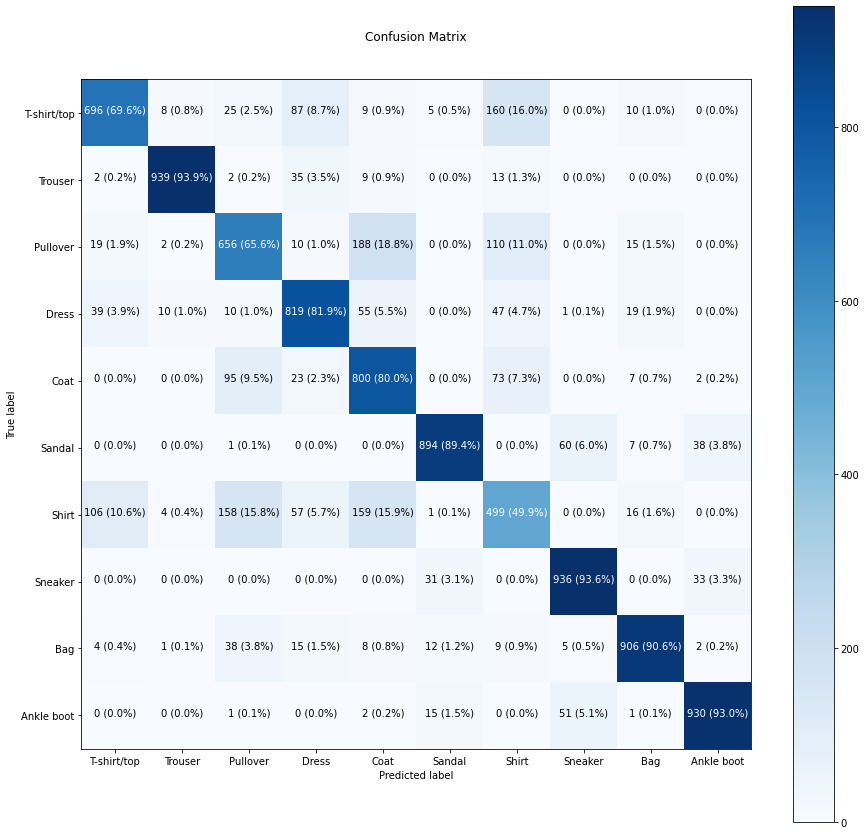

In [ ]:
# Tạo confusion matrix đẹp hơn
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

Trông tốt hơn nhiều rồi! (một trong những điểm nhìn yêu thích của tôi là confusion matrix với các ô vuông tối theo đường chéo).

Ngoại trừ kết quả không tốt như mong đợi ...

Có vẻ như mô hình của chúng ta đang bị nhầm lẫn giữa các lớp `Shirt` và `T-shirt/top` (ví dụ: dự đoán là `Shirt` trong khi đó thực ra là `T-shirt/top`).

> 🤔 **Câu hỏi:** Có phải mô hình của chúng ta đang bị nhầm lẫn giữa các lớp `Shirt` và `T-shirt/top` không? Tại sao bạn nghĩ rằng điều này có thể xảy ra? Làm thế nào để kiểm tra?

Chúng ta đã thấy cách các dự đoán mô hình sắp xếp theo truth label bằng cách sử dụng confusion matrix, nhưng làm thế nào để hình dung một vài dự đoán?

Hãy tạo một hàm để vẽ ảnh ngẫu nhiên cùng với dự đoán của nó.

> 🔑 **Lưu ý:** Thông thường khi làm việc với hình ảnh và các dạng dữ liệu trực quan khác, chúng ta nên trực quan hóa càng nhiều càng tốt để hiểu thêm về dữ liệu và kết quả đầu ra của mô hình.

In [ ]:
import random

# Tạo hàm vẽ ảnh ngẫu nhiên cùng với các dự đoán của nó
def plot_random_image(model, images, true_labels, classes):
  """Chọn một ảnh ngẫu nhiên, vẽ và dán nhãn nó với nhãn đúng và nhãn đã dự đoán.

  Đối số:
    model: mô hình đã huấn luyện (huấn luyện trên dữ liệu tương tự với dữ liệu trong ảnh.)
    images: tập hợp các ảnh ngẫu nhiên (ở dạng tensor).
    true_labels: mảng các nhãn gốc cho ảnh.
    classes: mảng các tên lớp cho anhe.

  Trả về:
    Biểu đồ ảnh ngẫu nhiên từ `images` với nhãn lớp đã dự đoán từ `model`
    cũng như nhãn lớp đúng từ `true_labels`.
  """
  # Thiết lập random integer
  i = random.randint(0, len(images))

  # Tạo các mục tiêu và dự đoán
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # cần reshape để mô hình có đúng kích thước
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Vẽ ảnh mục tiêu
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Thay đổi màu của tiêu đề tùy xem dự đoán đúng hay sai
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Thêm thông tin xlabel (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # đặt color là green hoặc red

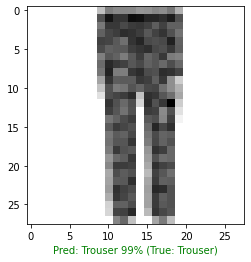

In [ ]:
# Kiểm tra ảnh ngẫu nhiên cũng như dự đoán của nó
plot_random_image(model=model_14,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)

Sau khi chạy cell trên một vài lần, chúng ta sẽ bắt đầu hiểu được mối quan hệ giữa các dự đoán của mô hình và các nhãn thực.

Bạn có thấy dự đoán nào mà mô hình bị nhầm lẫn không?

Dường như nó đang nhầm các lớp tương tự nhau, ví dụ: `Sneaker` với `Ankle boot`.

Nhìn vào hình ảnh, chúng ta có thể thấy trường hợp này xảy ra thế nào.

Shape tổng thể của `Sneaker` và `Ankle Boot` tương tự nhau.

Shape tổng thể có thể là một trong những pattern mà mô hình học được, do đó khi hai hình ảnh có shape giống nhau, các dự đoán của chúng sẽ bị nhầm lẫn.

### Mô hình của chúng ta đang học những pattern nào?

Chúng ta đã nói rất nhiều về cách mạng nơ-ron tìm thấy pattern ở dạng số, nhưng chính xác thì các pattern này trông như thế nào?

Hãy mở một mô hình và tìm hiểu.

Đầu tiên, chúng ta sẽ nhận được danh sách các layer của mô hình gần đây nhất (`model_14`) bằng cách sử dụng thuộc tính `layers`.

In [ ]:
# Tìm các layer của mô hình gần đây nhất
model_14.layers

Chúng ta có thể truy cập layer mục tiêu bằng cách lập chỉ mục.

In [ ]:
# Trích xuất một layer cụ thể
model_14.layers[1]

Chúng ta có thể tìm ra các pattern được học bởi một layer cụ thể bằng phương thức `get_weights()`.

Phương thức `get_weights()` trả về **trọng số**  (còn được gọi là ma trận trọng số) và độ lệch (còn được gọi là vectơ độ chệch) của một layer cụ thể.

In [ ]:
# Lấy các pattern của một layer trong mạng
weights, biases = model_14.layers[1].get_weights()

# Shape = 1 ma trận trọng số kích thước của dữ liệu đầu vào (28x28) mỗi nơ-ron (4)
weights, weights.shape

(array([[ 0.7150263 , -0.06077094, -0.99763054, -1.048431  ],
        [ 0.27732128, -0.47155392, -0.5291646 ,  0.02329262],
        [ 0.775243  ,  0.540276  , -1.1288569 , -0.7426157 ],
        ...,
        [-0.39453438,  0.47628698, -0.22641574,  0.25505954],
        [-0.4051576 ,  0.6181001 ,  0.23928389, -0.5038765 ],
        [ 0.23884599,  0.11606929, -0.12131333,  0.04352435]],
       dtype=float32), (784, 4))

Ma trận trọng số có cùng shape với dữ liệu đầu vào, trong trường hợp này là 784 (28x28 pixel). Và có một bản sao của ma trận trọng số cho mỗi nơ-ron trong layer đã chọn (layer đã chọn có 4 nơ-ron).

Mỗi giá trị trong ma trận trọng số tương ứng với cách một giá trị cụ thể trong dữ liệu đầu vào ảnh hưởng đến các quyết định của mạng.

Các giá trị này bắt đầu dưới dạng số ngẫu nhiên (được thiết lập bởi [tham số `kernel_initializer`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) khi tạo layer, mặc định là [`"glorot_uniform"`](https://www.tensorflow.org/api_docs/python/tf/keras/initializers/GlorotUniform)), sau đó được cập nhật thành các giá trị biểu diễn tốt hơn của dữ liệu (không ngẫu nhiên) bởi mạng nơ-ron trong quá trình huấn luyện.

![neural network supervised learning weight updates](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-fashion-mnist-learning.png)
*Quy trình mẫu: cách mạng nơ-ron có giám sát bắt đầu với trọng số ngẫu nhiên và cập nhật chúng để biểu diễn dữ liệu tốt hơn bằng cách xem xét các mẫu đầu ra lý tưởng.*

Bây giờ, hãy kiểm tra vectơ độ chệch.

In [ ]:
# Shape = 1 bias mỗi nơ-ron (chúng ta sử dụng 4 nơ-ron ở layer đầu tiên)
biases, biases.shape

(array([ 2.4485605e-02, -6.1463297e-04, -2.7230164e-01,  8.1124890e-01],
       dtype=float32), (4,))

Mỗi nơ-ron lại có một vectơ độ chệch. Mỗi vectơ độ chệch được ghép nối với một ma trận trọng số.

Các giá trị độ chệch được khởi tạo bằng 0 theo mặc định (sử dụng [tham số `bias_initializer`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)).

Vectơ độ chệch chỉ ra mức độ ảnh hưởng của các pattern trong ma trận trọng số tương ứng với layer kế tiếp.

In [ ]:
# Tính số lượng tham số trong mô hình
model_14.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_38 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_39 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Bây giờ chúng ta đã xây dựng một vài mô hình học sâu, đây là thời điểm tốt để chỉ ra rằng toàn bộ khái niệm đầu vào và đầu ra không chỉ liên quan đến mô hình nói chung mà còn liên quan tới *mọi* layer trong mô hình.

Bạn có thể đã đoán được điều này, nhưng bắt đầu từ layer đầu vào, đầu vào của mỗi layer tiếp theo sẽ là đầu ra của layer trước đó.

Chúng ta có thể thấy rõ điều này bằng cách sử dụng [`plot_model()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model).

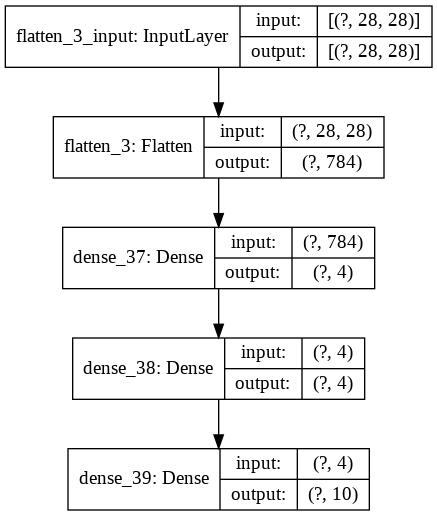

In [ ]:
from tensorflow.keras.utils import plot_model

# Xem đầu vào và đầu ra của từng layer
plot_model(model_14, show_shapes=True)

## Cách mô hình học (tóm tắt)

Chúng ta đã huấn luyện rất nhiều mô hình, nhưng chưa bao giờ thực sự thảo luận sâu về nó. Vậy chính xác thì một mô hình học như thế nào?

Mô hình học bằng cách cập nhật và cải thiện ma trận trọng số và giá trị độ chệch mỗi epoch (trong trường hợp này, chúng ta gọi hàm `fit()`).

Nó thực hiện bằng cách so sánh các pattern đã học giữa dữ liệu và nhãn với nhãn thực tế.

Nếu các pattern hiện tại (ma trận trọng số và giá trị độ chệch) không làm giảm hàm mất mát mong muốn (loss cao hơn nghĩa là dự đoán tệ hơn) thì optimizer sẽ cố gắng hướng mô hình cập nhật các pattern theo cách phù hợp (sử dụng giá trị thực nhãn làm tham chiếu).

Quá trình sử dụng các nhãn thực làm tham chiếu để cải thiện các dự đoán của mô hình được gọi là [**backpropagation (lan truyền ngược)**](https://en.wikipedia.org/wiki/Backpropagation).

Nói cách khác, dữ liệu và nhãn truyền qua một mô hình (**truyền xuôi**) và nó cố gắng tìm hiểu mối quan hệ giữa dữ liệu và nhãn.

Và nếu mối quan hệ tìm hiểu được này không gần với mối quan hệ thực tế hoặc nó có thể cải thiện, thì mô hình sẽ tự quay lại (**truyền ngược**), điều chỉnh ma trận trọng số và giá trị độ chệch để biểu diễn dữ liệu tốt hơn.

Nếu tất cả những điều này còn khó hiểu (không sao cả, ở trên là mô tả rất ngắn gọn), hãy xem tài liệu trong phần Tài liệu tham khảo để biết thêm.

## 🛠 Bài tập thực hành
> **Lưu ý:** Các bạn cần làm phần bài tập này để chuẩn bị cho phiên review lab.

1. Luyện tập với mạng nơ-ron khoảng 10 phút trong [TensorFlow Playground](https://playground.tensorflow.org/). Hãy thử các giá trị learning rate khác nhau và xem điều gì sẽ xảy ra nếu tăng hoặc giảm các giá trị này.
2. Sao chép mô hình trong hình sau ở [TensorFlow Playground diagram](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=6,6,6,6,6&seed=0.51287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&discretize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&dataset_hide=true&problem_hide=true&noise_hide=true&batchSize_hide=true) bằng code của TensorFlow. Biên dịch nó với Adam optimizer, binary cross-entropy loss và accuracy; sau đó kiểm tra bản tóm tắt của mô hình.
![tensorflow playground example neural network](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-tensorflow-playground-replication-exercise.png)

*Thử mạng này trong [TensorFlow Playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=6,6,6,6,6&seed=0.51287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&discretize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&dataset_hide=true&problem_hide=true&noise_hide=true&batchSize_hide=true). Gợi ý: có 5 lớp ẩn nhưng lớp đầu ra không được mô tả, các bạn cần quyết định lớp đầu ra dựa trên dữ liệu đầu vào.*

3. Tạo một tập dữ liệu phân loại bằng hàm [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) của Scikit-learn, trực quan hóa nó rồi xây dựng một mô hình để khớp với độ chính xác trên 85%.
4. Tạo một hàm (hoặc viết code) để hiển thị đồng thời nhiều dự đoán hình ảnh cho fashion MNIST. Lập biểu đồ ít nhất 3 hình ảnh khác nhau và nhãn dự đoán của chúng cùng một lúc.
5. Tạo lại [hàm softmax](https://en.wikipedia.org/wiki/Softmax_function) của [TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) trong code riêng của bạn. Đảm bảo nó có thể chấp nhận tensor và trả về tensor sau khi áp dụng hàm softmax.
6. Huấn luyện mô hình để đạt được độ chính xác trên 88% trên tập kiểm tra fashion MNIST. Sau đó, lập biểu đồ confusion matrix để xem kết quả.
7. Tạo hàm để hiển thị hình ảnh của một lớp nhất định trong tập dữ liệu fashion MNIST và đưa ra dự đoán trên đó. Ví dụ: vẽ 3 hình của lớp `T-shirt` với các dự đoán của chúng.



## Tài liệu đọc thêm 📖
* Xem video số 2 về mạng nơ-ron của 3Blue1Brown: [*Gradient descent, how neural networks learn*](https://www.youtube.com/watch?v=IHZwWFHWa-w). Sau đó, viết khoảng 100 từ về những gì bạn học được.
  *  Nếu chưa sẵn sàng, hãy xem video 1: [*But what is a Neural Network?*](https://youtu.be/aircAruvnKk). Lưu ý hàm kích hoạt mà họ nói tới ở cuối.
* Xem video [MIT's introduction to deep learning lecture 1](https://youtu.be/njKP3FqW3Sk) (nếu chưa sẵn sàng) để hiểu các khái niệm sau việc sử dụng các hàm tuyến tính và phi tuyến tính.
*  Dành 1 giờ đọc cuốn sách [Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/index.html) (Michael Nielsen).
* Đọc tài liệu về [activation functions của ML Glossary](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html). Bạn thích phần nào nhất?
  * Sau khi đọc xong ML-Glossary, hãy tìm "tensorflow activation functions" để xem hàm kích hoạt nào có sẵn trong TensorFlow.